In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 14.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
import collections
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from scipy import spatial

### Example

In [ ]:
doc1 = 'Game of Thrones is an amazing tv series!'
doc2 = 'Game of Thrones is the best tv series!'
doc3 = 'Game of Thrones is so great'

In [ ]:
STOPWORDS = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
def calculateBOW(wordset,l_doc):
    tf_diz = dict.fromkeys(wordset,0)
    for word in l_doc:
        tf_diz[word]=np.count_nonzero(l_doc == word)
    return tf_diz

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
  
lemmatizer = WordNetLemmatizer()
  
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
  
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a")) # a is for adjective

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


rocks : rock
corpora : corpus
better : good


In [ ]:
data = [doc1, doc2, doc3]

In [ ]:
data = [np.setdiff1d(re.sub(r"[^a-zA-Z0-9]", " ", lemmatizer.lemmatize(obs).lower()).split(), STOPWORDS) for obs in data]

In [ ]:
vocabulary = np.unique(np.concatenate(data))

In [ ]:
data

[array(['amazing', 'game', 'series', 'thrones', 'tv'], dtype='<U7'),
 array(['best', 'game', 'series', 'thrones', 'tv'], dtype='<U7'),
 array(['game', 'great', 'thrones'], dtype='<U7')]

In [ ]:
df = pd.DataFrame([calculateBOW(vocabulary,obs) for obs in data])

In [ ]:
df

,amazing,best,game,great,series,thrones,tv
0,1,0,1,0,1,1,1
1,0,1,1,0,1,1,1
2,0,0,1,1,0,1,0


## Bag of Words

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv").iloc[:200,:]

In [ ]:
df.tail()

In [ ]:
X = np.asarray(df.iloc[:,0])

In [ ]:
data = [np.setdiff1d(re.sub(r"[^a-zA-Z0-9]", " ", lemmatizer.lemmatize(obs).lower()).split(), STOPWORDS) for obs in X]

In [ ]:
vocabulary = np.unique(np.concatenate(data))

In [ ]:
data_bow = pd.DataFrame([calculateBOW(vocabulary,obs) for obs in data])

In [ ]:
data_bow.head(5)

,0,00,000,00am,1,10,100,103,11,12,...,zhang,zimbalist,ziyi,zombie,zombies,zone,zoo,zoom,zooms,zwick
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = np.asarray(df.iloc[:,1])
y[y=="positive"] = 1
y[y=="negative"] = 0
y = y.reshape(-1,1).astype('float32')

In [ ]:
y[y=="positive"] = 1
y[y=="negative"] = 0

In [ ]:
y = y.reshape(-1,1).astype('float32')

In [ ]:
X.shape

(200,)

In [ ]:
has_digit = [bool(re.search(r'\d', v)) for v in vocabulary]

In [ ]:
vocabulary[has_digit]

array(['0', '00', '000', '00am', '1', '10', '100', '103', '11', '12',
       '13', '13th', '14', '15', '16', '17', '1794', '1800', '18th', '19',
       '1928', '1930s', '1936', '1937', '1940', '1947', '1956', '1960s',
       '1963', '1970', '1976', '1980s', '1981', '1984', '1984ish', '1990',
       '1990s', '1992', '1993', '1995', '1997', '1999', '2', '20', '2000',
       '2000s', '2002', '2003', '2004', '2006', '20th', '22', '227th',
       '23', '25', '26', '29', '3', '30', '300', '31', '33', '360',
       '36th', '37', '4', '47', '5', '50', '51', '5yo', '6', '60', '7',
       '70', '700', '70s', '74', '75', '76', '77', '79', '8', '80', '80s',
       '9', '90', '90s', '95', '950', '98', '99', 'hp3', 'mst3k',
       'tt0846789'], dtype='<U26')

In [ ]:
data_bow = data_bow.drop(columns=vocabulary[has_digit])

In [ ]:
# y_cat = to_categorical(y)
y_cat = y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_bow, y_cat, test_size=0.5, random_state=42)
X_train = np.array(X_train.reset_index(drop=True))
X_test = np.array(X_test.reset_index(drop=True))

In [ ]:
X_train_tensor = tf.convert_to_tensor(X_train)
X_test_tensor = tf.convert_to_tensor(X_test)

In [ ]:
X_train_tensor.shape

TensorShape([100, 7334])

## Create Pairs

In [ ]:
def create_pairs(x, y):

  pairs_list = []
  labels_list = []

  for i in range(len(x)):
    for j in range(len(x)):
      if i == j:
        continue;
      if j < i:
        continue;
      pairs_list.append((x[i], x[j]))
      labels_list.append((y[i][0], y[j][0]))

  return np.array(pairs_list), np.array(labels_list)

In [ ]:
x_train_pairs, y_train_labels = create_pairs(X_train, y_train)
x_test_pairs, y_test_labels = create_pairs(X_test, y_test)

In [ ]:
x_train_pairs.shape

(4950, 2, 7334)

In [ ]:
y_test_labels.shape

(4950, 2)

In [ ]:
# if labels are the same -> label 0
# if labels are not the same -> label 1

y_train_labels = np.where(y_train_labels[:,0] == y_train_labels[:,1], 0, 1)
y_train_labels

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
y_test_labels = np.where(y_test_labels[:,0] == y_test_labels[:,1], 0, 1)
y_test_labels.sum()

2419

## Run model

In [ ]:
# https://keras.io/examples/vision/siamese_contrastive/
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))

len_bag = x_train_pairs.shape[2]

def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    output = tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))
    return output

def cosine_sim(vects):
    x, y = vects
    x = tf.math.l2_normalize(x)
    y = tf.math.l2_normalize(y)

    return tf.multiply(x,y)

def loss(margin=0.5):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """


        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss



input = layers.Input((len_bag,))
x = tf.keras.layers.BatchNormalization()(input)
x = layers.Dense(2000)(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(100)(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(50)(x)

embedding_network = tf.keras.Model(input, x)


input_1 = layers.Input((len_bag,))
input_2 = layers.Input((len_bag,))

# As mentioned above, Siamese Network share weights between
# tower networks (sister networks). To allow this, we will use
# same embedding network for both tower networks.
tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(cosine_sim)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = tf.keras.Model(inputs=[input_1, input_2], outputs=output_layer)

In [ ]:
siamese.compile(loss=loss(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])
siamese.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 7334)]       0           []                               
                                                                                                  
 input_25 (InputLayer)          [(None, 7334)]       0           []                               
                                                                                                  
 model_9 (Functional)           (None, 50)           14904486    ['input_24[0][0]',               
                                                                  'input_25[0][0]']               
                                                                                                  
 lambda_7 (Lambda)              (None, 50)           0           ['model_9[0][0]',         

In [ ]:
x_train_pairs[:,0,:].shape

(4950, 7334)

In [ ]:
x_train_1 = x_train_pairs[:,0,:]
x_train_2 = x_train_pairs[:,1,:]

x_test_1 = x_test_pairs[:,0,:]
x_test_2 = x_test_pairs[:,1,:]

x_train_1 = tf.convert_to_tensor(x_train_1)
x_train_2 = tf.convert_to_tensor(x_train_2)

x_test_1 = tf.convert_to_tensor(x_test_1)
x_test_2 = tf.convert_to_tensor(x_test_2)

y_train_labels = tf.convert_to_tensor(y_train_labels)
y_test_labels = tf.convert_to_tensor(y_test_labels)


y_train_labels = tf.cast(y_train_labels, tf.float32)
y_test_labels = tf.cast(y_test_labels, tf.float32)

x_test_1 = tf.cast(x_test_1, tf.float32)
x_test_2 = tf.cast(x_test_2, tf.float32)

x_train_1 = tf.cast(x_train_1, tf.float32)
x_train_2 = tf.cast(x_train_2, tf.float32)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

history = siamese.fit(
    [x_train_1, x_train_2],
    y_train_labels,
    validation_data=([x_test_1, x_test_2], y_test_labels),
    batch_size=16,
    epochs=10,
)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/10
310/310 [==============================] - 18s 51ms/step - loss: 0.0318 - accuracy: 0.6436 - val_loss: 0.0632 - val_accuracy: 0.5117
Epoch 2/10
310/310 [==============================] - 16s 51ms/step - loss: 0.0098 - accuracy: 0.8119 - val_loss: 0.0989 - val_accuracy: 0.5103
Epoch 3/10
310/310 [==============================] - 17s 56ms/step - loss: 0.0083 - accuracy: 0.8622 - val_loss: 0.1482 - val_accuracy: 0.5240
Epoch 4/10
310/310 [==============================] - 15s 48ms/step - loss: 0.0060 - accuracy: 0.9087 - val_loss: 0.1593 - val_accuracy: 0.5218
Epoch 5/10
310/310 [==============================] - 15s 48ms/step - loss: 0.0050 - accuracy: 0.9232 - val_loss: 0.1750 - val_accuracy: 0.5083
Epoch 6/10
310/310 [==============================] - 16s 51ms/step - loss: 0.0050 - accuracy: 0.9261 - val_loss: 0.1794 - val_accuracy: 0.5030
Epoch 7/10
310/310 [==============================] - 17s 54ms/step - loss: 0.0051 - accuracy: 0.9362 - val_loss: 0.1707 - val_accuracy:

## BERT

In [ ]:
!pip install spacy-sentence-bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.2 MB/s 
     |████████████████████████████████| 5.5 MB 48.3 MB/s 
     |████████████████████████████████| 1.3 MB 54.4 MB/s 
     |████████████████████████████████| 182 kB 31.0 MB/s 
     |████████████████████████████████| 7.6 MB 51.6 MB/s 
  Created wheel for spacy-sentence-bert: filename=spacy_sentence_bert-0.1.2-py3-none-any.whl size=27201 sha256=909865a1eaa3f272dc718c3ade5efc101695370a53ed179ea23ce070c8e1720e
  Stored in directory: /root/.cache/pip/wheels/54/e2/4a/e3f24fb6729ada3c83377de5217261c0e2f153c5a6f36d37d0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=5a3d2c9fff94ee288f67a513791cb59fdfc9a44d05bbace982d9a9e81601c5ed
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built spacy-sentence-bert sen

In [ ]:
import spacy_sentence_bert
import spacy

In [ ]:
nlp = spacy_sentence_bert.load_model('en_stsb_roberta_large')

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
df.iloc[:,1]

0      positive
1      positive
2      positive
3      negative
4      positive
         ...   
395    negative
396    negative
397    positive
398    negative
399    positive
Name: sentiment, Length: 400, dtype: object

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Projekt/IMDB Dataset.csv").iloc[:200,:]
y = np.asarray(df.iloc[:,1])
y[y=="positive"] = 1
y[y=="negative"] = 0
y = y.reshape(-1,1).astype('float32')
X = np.array([nlp(df.iloc[i,0]).vector for i in range(df.shape[0])])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape

(100, 1024)

In [ ]:
y_test.sum()

45.0

In [ ]:
y = np.asarray(df.iloc[:,1])
y[y=="positive"] = 1
y[y=="negative"] = 0
y = y.reshape(-1,1).astype('float32')

x_train_pairs, y_train_labels = create_pairs(X_train, y_train)
x_test_pairs, y_test_labels = create_pairs(X_test, y_test)

In [ ]:
# if labels are the same -> label 0
# if labels are not the same -> label 1
y_train_labels = np.where(y_train_labels[:,0] == y_train_labels[:,1], 0, 1)
y_train_labels

y_test_labels = np.where(y_test_labels[:,0] == y_test_labels[:,1], 0, 1)
y_test_labels.sum()

2475

In [ ]:
x_train_pairs[0,0,:]

array([-0.39184934,  0.04102556, -0.9326409 , ..., -0.17441183,
       -1.7926412 ,  2.0680087 ], dtype=float32)

In [ ]:
x_train_pairs[0,1,:]

array([-0.10736209,  0.946751  ,  0.6190511 , ..., -0.44930863,
       -0.44169062,  1.4307336 ], dtype=float32)

In [ ]:
# https://keras.io/examples/vision/siamese_contrastive/
# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))

len_bag = x_train_pairs.shape[2]

def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    x = tf.math.l2_normalize(x)
    y = tf.math.l2_normalize(y)
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    output = tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))
    return output

def cosine_sim(vects):
    x, y = vects
    x = tf.math.l2_normalize(x)
    y = tf.math.l2_normalize(y)

    return tf.multiply(x,y)

def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):

        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """


        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        # return tf.math.reduce_mean(
        #     (1 - y_true) * square_pred + (y_true) * margin_square
        # )

        return tfa.losses.contrastive_loss(y_true, square_pred, margin=0.5)

    return contrastive_loss



input = layers.Input((len_bag,))
x = tf.keras.layers.BatchNormalization()(input)
x = layers.Dense(512)(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256)(x)
x = layers.Dense(128)(x)
x = layers.Dense(32)(x)

embedding_network = tf.keras.Model(input, x)


input_1 = layers.Input((len_bag,))
input_2 = layers.Input((len_bag,))

# As mentioned above, Siamese Network share weights between
# tower networks (sister networks). To allow this, we will use
# same embedding network for both tower networks.
tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = tf.keras.Model(inputs=[input_1, input_2], outputs=output_layer)

In [ ]:
siamese.compile(loss=loss(), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), metrics=["accuracy"], run_eagerly=True)
siamese.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1024)]       0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1024)]       0           []                               
                                                                                                  
 model (Functional)             (None, 32)           697248      ['input_2[0][0]',                
                                                                  'input_3[0][0]']                
                                                                                                  
 lambda (Lambda)                (None, 1)            0           ['model[0][0]',            

In [ ]:
x_train_1 = x_train_pairs[:,0,:]
x_train_2 = x_train_pairs[:,1,:]

x_test_1 = x_test_pairs[:,0,:]
x_test_2 = x_test_pairs[:,1,:]

x_train_1 = tf.convert_to_tensor(x_train_1)
x_train_2 = tf.convert_to_tensor(x_train_2)

x_test_1 = tf.convert_to_tensor(x_test_1)
x_test_2 = tf.convert_to_tensor(x_test_2)

y_train_labels = tf.convert_to_tensor(y_train_labels)
y_test_labels = tf.convert_to_tensor(y_test_labels)


y_train_labels = tf.cast(y_train_labels, tf.float32)
y_test_labels = tf.cast(y_test_labels, tf.float32)

x_test_1 = tf.cast(x_test_1, tf.float32)
x_test_2 = tf.cast(x_test_2, tf.float32)

x_train_1 = tf.cast(x_train_1, tf.float32)
x_train_2 = tf.cast(x_train_2, tf.float32)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

history = siamese.fit(
    [x_train_1, x_train_2],
    y_train_labels,
    validation_data=([x_test_1, x_test_2], y_test_labels),
    batch_size=128,
    epochs=10
)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


39/39 [==============================] - 2s 55ms/step - loss: 0.0685 - accuracy: 0.4467 - val_loss: 0.0626 - val_accuracy: 0.5000
Epoch 2/10
39/39 [==============================] - 2s 53ms/step - loss: 0.0632 - accuracy: 0.4115 - val_loss: 0.0623 - val_accuracy: 0.4998
Epoch 3/10
39/39 [==============================] - 2s 51ms/step - loss: 0.0545 - accuracy: 0.3394 - val_loss: 0.0618 - val_accuracy: 0.4907
Epoch 4/10
39/39 [==============================] - 2s 52ms/step - loss: 0.0489 - accuracy: 0.2972 - val_loss: 0.0613 - val_accuracy: 0.4618
Epoch 5/10
39/39 [==============================] - 2s 51ms/step - loss: 0.0431 - accuracy: 0.2517 - val_loss: 0.0607 - val_accuracy: 0.4226
Epoch 6/10
39/39 [==============================] - 2s 52ms/step - loss: 0.0385 - accuracy: 0.2135 - val_loss: 0.0602 - val_accuracy: 0.4006
Epoch 7/10
39/39 [==============================] - 2s 52ms/step - loss: 0.0345 - accuracy: 0.1887 - val_loss: 0.0596 - val_accuracy: 0.3907
Epoch 8/10
39/39 [======

In [ ]:
a = siamese.predict([x_test_1, x_test_2])

155/155 [==============================] - 2s 10ms/step


In [ ]:
y_test_labels.numpy()

array([1., 1., 1., ..., 1., 0., 1.], dtype=float32)

In [ ]:
results = pd.DataFrame(a)
results["true"] = y_test_labels
results.iloc[:50,:]

,0,true
0,0.271064,1.0
1,0.165881,1.0
2,0.258679,1.0
3,0.147815,1.0
4,0.278285,1.0
5,0.187124,1.0
6,0.333984,0.0
7,0.250997,1.0
8,0.304260,1.0
9,0.259884,1.0


In [ ]:
import matplotlib.pyplot as plt

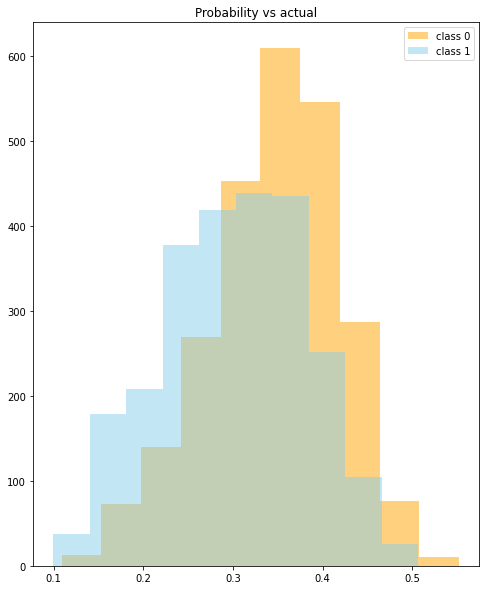

In [ ]:
plt.figure(figsize=(8,10))
plt.hist(results[results["true"] == 0][0], color="orange", alpha = 0.5)
plt.hist(results[results["true"] == 1][0], color="skyblue", alpha = 0.5)
plt.legend(["class 0", "class 1"])
plt.title("Probability vs actual")
plt.show()

In [ ]:
preds = []

for i in range(len(X_test)):
    pairs_list = []

    for j in range(len(X_train)):
        pairs_list.append((X_test[i], X_train[j]))

    pairs_list = np.array(pairs_list)

    b = siamese.predict([pairs_list[:,0,:], pairs_list[:,1,:]])
    preds.append(int(b[np.where(y_train.flatten() == 0)].mean() < b[np.where(y_train.flatten() == 1)].mean()))

4/4 [==============================] - 0s 10ms/step


In [ ]:
np.mean(y_test.flatten()==preds)

0.76

## BERT + NT_Xent

In [ ]:
# Define the contrastive loss function, NT_Xent (Tensorflow version)
def NT_Xent_tf(zi, zj, tau=1):
    """ Calculates the contrastive loss of the input data using NT_Xent. The
    equation can be found in the paper: https://arxiv.org/pdf/2002.05709.pdf
    (This is the Tensorflow implementation of the standard numpy version found
    in the NT_Xent function).
    
    Args:
        zi: One half of the input data, shape = (batch_size, feature_1, feature_2, ..., feature_N)
        zj: Other half of the input data, must have the same shape as zi
        tau: Temperature parameter (a constant), default = 1.

    Returns:
        loss: The complete NT_Xent constrastive loss
    """
    z = tf.cast(tf.concat((zi, zj), 0), dtype=tf.float32)
    loss = 0
    for k in range(zi.shape[0]):
        # Numerator (compare i,j & j,i)
        i = k
        j = k + zi.shape[0]
        # Instantiate the cosine similarity loss function
        cosine_sim = tf.keras.losses.CosineSimilarity(axis=-1, reduction=tf.keras.losses.Reduction.NONE)
        sim = tf.squeeze(- cosine_sim(tf.reshape(z[i], (1, -1)), tf.reshape(z[j], (1, -1))))
        numerator = tf.math.exp(sim / tau)

        # Denominator (compare i & j to all samples apart from themselves)
        sim_ik = - cosine_sim(tf.reshape(z[i], (1, -1)), z[tf.range(z.shape[0]) != i])
        sim_jk = - cosine_sim(tf.reshape(z[j], (1, -1)), z[tf.range(z.shape[0]) != j])
        denominator_ik = tf.reduce_sum(tf.math.exp(sim_ik / tau))
        denominator_jk = tf.reduce_sum(tf.math.exp(sim_jk / tau))

        # Calculate individual and combined losses
        loss_ij = - tf.math.log(numerator / denominator_ik)
        loss_ji = - tf.math.log(numerator / denominator_jk)
        loss += loss_ij + loss_ji
    
    # Divide by the total number of samples
    loss /= z.shape[0]

    return loss



input = layers.Input((len_bag,))
x = layers.Dense(500)(input)
x = layers.Dense(50)(x)
x = tf.math.l2_normalize(x)

embedding_network = tf.keras.Model(input, x)


input_1 = layers.Input((len_bag,))
input_2 = layers.Input((len_bag,))

# As mentioned above, Siamese Network share weights between
# tower networks (sister networks). To allow this, we will use
# same embedding network for both tower networks.
tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)


output_layer = ContrastiveLossLayer()(tower_1, tower_2)
siamese = tf.keras.Model(inputs=[input_1, input_2], outputs=output_layer)

siamese.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])
siamese.summary()